# Analysing the correlation between rainfall, surface water extent, and discharge

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.frequencies import to_offset

## Analysis parameters

In [2]:
okavango_rainfall='results/okavango_rainfall_2013-12_to_2021-05-31.csv'
upstream_rainfall='results/upstream_rainfall_2013-12_to_2021-05-31.csv'
water_extent='results/water_extent_2013-12_to_2021-05.csv'
discharge = 'data/mohembo_daily_water_discharge_data.csv'

## Read files

In [3]:
df=pd.read_csv(okavango_rainfall, index_col='time', parse_dates=True)[0:-1]
upr=pd.read_csv(upstream_rainfall, index_col='time',parse_dates=True)[0:-1]
we=pd.read_csv(water_extent, index_col='time',parse_dates=True)
dis=pd.read_csv(discharge)

## Process discharge data

In [4]:
dis['date'] = pd.to_datetime(dis['date'], dayfirst=True)
dis = dis.set_index('date')
dis = dis.resample('QS-DEC').sum()
dis.index = dis.index + to_offset("1M")
dis = dis[dis.index >= pd.to_datetime('2013-12-31')]

### Merge into one dataframe

In [5]:
df['upstream_rain']=upr
df['water_extent']=we
df['discharge']=dis
df = df.rename({'cumulative 3-month rainfall (mm)':'okavango_rain'},axis=1)

## Plot

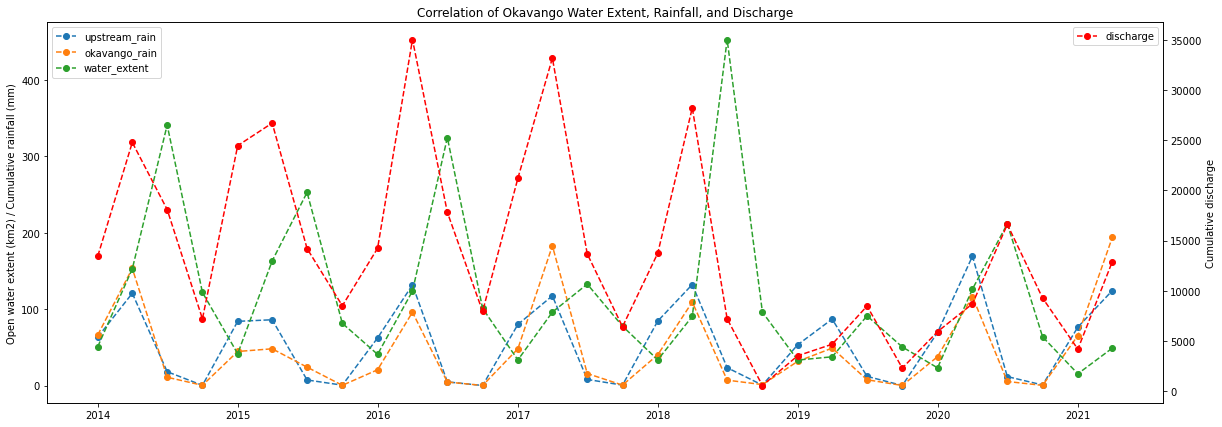

In [14]:
#set figure
fig, ax1 = plt.subplots(figsize=(20,7))
ax2 = ax1.twinx()
#add plots
ax1.plot(df['upstream_rain'], label = 'upstream_rain', linestyle='dashed', marker='o')
ax1.plot(df['okavango_rain'], label = 'okavango_rain', linestyle='dashed', marker='o')
ax1.plot(df['water_extent'], label = 'water_extent', linestyle='dashed', marker='o')
ax2.plot(df['discharge'], label='discharge', linestyle='dashed', marker='o', color='red')
#tidy up figure
ax1.set_ylabel('Open water extent (km2) / Cumulative rainfall (mm)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Cumulative discharge')
plt.title('Correlation of Okavango Water Extent, Rainfall, and Discharge')
plt.savefig(f'results/Rainfall_water_extent_and_discharge.png');